<a href="https://colab.research.google.com/github/Chitha19/Azure/blob/main/Copy_of_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparation

Upload file supermarket.csv 

Answer:

1.   What is the business problem to address?
2.   What data are given or should be given to us as a data engineer?
3.   How are these data related to a colleague data scientist?

For example, given a list of products and other relevant data, a data scientist may want to predict sales, i.e., using maching learning model.


#1.Data Analysis
If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc. To obtain, these values by using the describe function in Pandas.

Ref: [Exploratory Data Analysis, Feature Engineering, and Modelling using Supermarket Sales Data. Part 1](https://towardsdatascience.com/exploratory-data-analysis-feature-engineering-and-modelling-using-supermarket-sales-data-part-1-228140f89298 )


In [ ]:
import pandas as pd
import numpy as np

#package for data visualzation
import matplotlib.pyplot as plt
import seaborn as sns

#Makes graph display in notebook
%matplotlib inline   

In [ ]:
supermarket_data = pd.read_csv('supermarket.csv')

In [ ]:
supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


**Column Information**

1.   Product_Identifier: This is a unique ID for each particular product.
2.   Supermarket_Identifier: This is a unique ID for each supermarket
3.   Product_Supermarket_Identifier: This is a concatenation of the product and supermarket identifier.
4.   Product_Weight: Weight of the product.
5.   Product_Fat_Content: The amount of fat contained in the product.
6.   Product_Shelf_Visibility: According to the data description, this is the total display area in percentage allocated to a group of the product.
7.  Product_Type: This is the category to which the product belongs.
8.   Product_Price: The price of the product.
9.   Supermarket_Opening_Year: The year the supermarket was opened.สต์
10.  Supermarket _Size: This is the size of the supermarket. It has been categorized into small, medium, and High.
11.   Supermarket_Location_Type: This feature is a description of the location of the supermarket. According to the data, there are 3 clusters (Cluster 1,2, and 3). 
12.   Supermarket_Type: The type of supermarket categorizes into Grocery store, Supermarket Type1, Supermarket Type2, Supermarket Type3.
13.   Product_Supermarket_Sales: This is our target variable for this post. It is the total amount of sales made in the supermarket.


In [ ]:
#Displaty the number of rows and columns
supermarket_data.shape

(4990, 13)

In [ ]:
supermarket_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [ ]:
supermarket_data['Supermarket_Type'].unique()

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [ ]:
len(supermarket_data['Supermarket_Type'].unique())

4

In [ ]:
supermarket_data['Product_Type'].unique()

array(['Soft Drinks', 'Dairy', 'Hard Drinks', 'Canned', 'Frozen Foods',
       'Fruits and Vegetables', 'Snack Foods', 'Baking Goods',
       'Starchy Foods', 'Meat', 'Seafood', 'Breakfast', 'Breads',
       'Health and Hygiene', 'Household', 'Others'], dtype=object)

In [ ]:
supermarket_data.Product_Type.value_counts()

Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64

In [ ]:
supermarket_data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

In [ ]:
#view columns id
supermarket_data.head(2)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69


In [ ]:
#Suppose we decide that these columns may not be important or relevant to the predictive model
#Remove Id columns
cols_2_remove = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']
newdata = supermarket_data.drop(cols_2_remove, axis=1)

In [ ]:
newdata.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [ ]:
newdata.shape

(4990, 10)

In [ ]:
#divide into categorical (non-numerical) and numerical columns
cat_cols = ['Product_Fat_Content','Product_Type',
            'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]

num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']

##Without Visualization
What can we tell about each column?

In [ ]:
#find the number of cols in cat_cols
len(cat_cols)

5

In [ ]:
newdata['Product_Fat_Content'].value_counts()

Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64

#2.Data Visulization


##Bar Plot
Use bar plot for categorical features or columns

Note: The gca() function in pyplot module of matplotlib library is used to get the current Axes instance on the current figure matching the given keyword args, or create one. 


In [ ]:
counts = newdata['Product_Fat_Content'].value_counts() # find the counts for each unique category in column Product_Fat_Content
counts

Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64

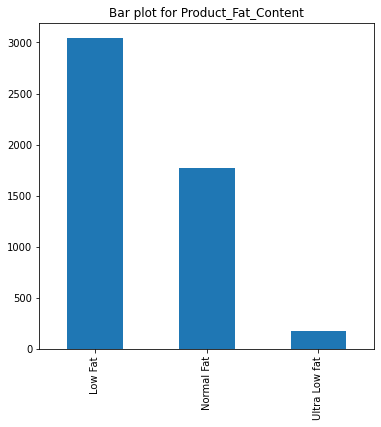

In [ ]:
fig = plt.figure(figsize=(6,6)) # define plot area in inches
ax = fig.gca() #get current axes or define axes
ax.set_title('Bar plot for Product_Fat_Content')

counts.plot.bar(ax = ax) # Use the plot.bar method on the counts 
plt.show()

##Scatter plot 
Use scatter plot for numerical features or columns. In this case, we look at num_cols.

 **num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']**

Notice that Product_Supermarket_Sales and **Product_Shelf_Visibility** were right skewed, log transform could be applied to create a normal distribution.

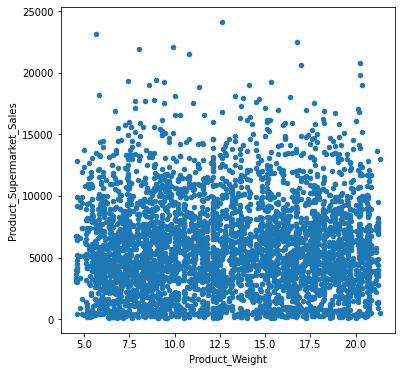

In [ ]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() #get current axes or define axes
newdata.plot.scatter(x = 'Product_Weight', y = 'Product_Supermarket_Sales', ax = ax)
plt.show()

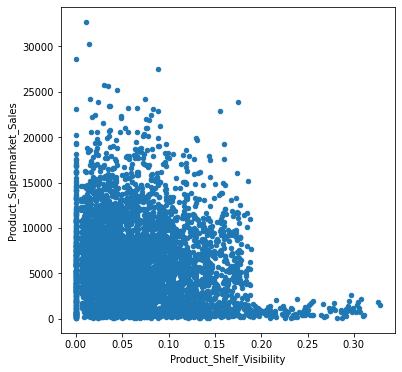

In [ ]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() #get current axes or define axes
newdata.plot.scatter(x = 'Product_Shelf_Visibility', y = 'Product_Supermarket_Sales', ax = ax)
plt.show()

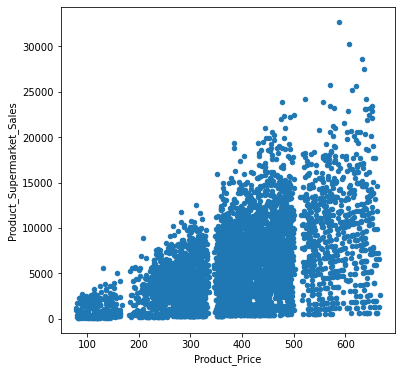

In [ ]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() #get current axes or define axes
newdata.plot.scatter(x = 'Product_Price', y = 'Product_Supermarket_Sales', ax = ax)
plt.show()

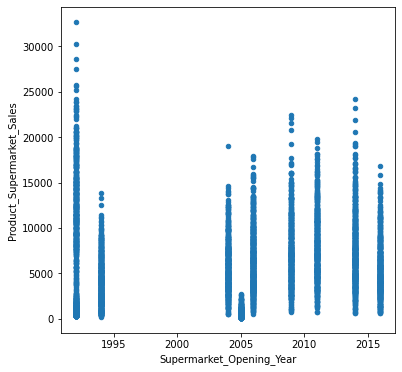

In [ ]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() #get current axes or define axes
newdata.plot.scatter(x = 'Supermarket_Opening_Year', y = 'Product_Supermarket_Sales', ax = ax)
plt.show()

##Box Plot
Plot categorical columns against target column using seaborn

Syntax :
seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)

**Parameters:**

x = feature of dataset

y = feature of dataset

hue = feature of dataset

data = datafram or full dataset

color = color name

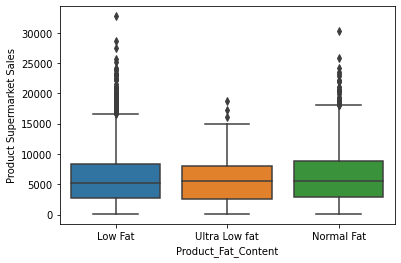

In [ ]:
sns.boxplot(x='Product_Fat_Content', y = 'Product_Supermarket_Sales', data=newdata)
plt.xlabel('Product_Fat_Content',) # Set text for the x axis
plt.ylabel('Product Supermarket Sales')# Set text for y axis
plt.show()
  

##Heat map
Use pandas .corr( ) function to calculate correlation among data.
The seaborn heatmap takes the correlation matrix calculated on the numerical features in the dataset and makes a heated plot of it. 

**Interpreting Heatmaps**
Each square in a heatmap shows how much any two feature correlates (is there some kind of relationship between them). Does the increase in one feature result in the increase of the other? (Positive correlation) or does the increase in one result in the decrease of the other? (Negative correlation).

*   The vertical range running from 0.0 to 1.0 shows you the relative size of the correlation between any two features, where hotter values are higher and means more correlation.
*   The diagonal almost-whitish portion of the matrix shows that all features are highly correlated to themselves.

Investigate the relationship between all the features in the dataset, plot each feature against the others. Use Seaborn’s pairplot( ) function


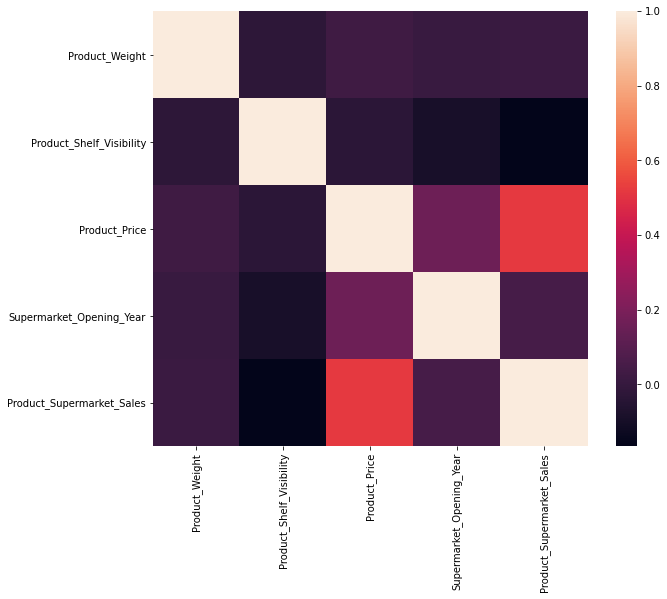

In [ ]:
#CORRELATION MATRIX AMONG FEATURES
#calculate the correlation on the data using the pandas .corr( ) function we store it in the variable corrmat
corrmat = newdata.corr()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, square=True)
plt.show()

#3.Feature Engineering
FE is to use knowledge of the dataset to create new features that can help a machine learning model perform better.

To do Feature Engineering, a **data scientist** must use domain knowledge (Knowledge about a specific field), math and programming skills to transform or come up with new features that will help a machine learning model perform better.


Ref: [Feature Engineering and Data Preparation Using Supermarket Sales Data](https://towardsdatascience.com/feature-engineering-and-data-preparation-using-supermarket-sales-data-part-2-171b7a7a7eb7)

##Ex1 
Create a new  feature that is a Boolean (binary) class to separate Normal Fat from the other classes, i.e., reducing to two types of fat.

In [ ]:
#print out all unique values
newdata['Product_Fat_Content'].unique()

array(['Low Fat', 'Ultra Low fat', 'Normal Fat'], dtype=object)

In [ ]:
fat_content_dict = {'Low Fat': 0, 'Ultra Low fat': 0, 'Normal Fat': 1}
newdata['is_normal_fat'] = newdata['Product_Fat_Content'].map(fat_content_dict)
#count the number of  values in each class
newdata['is_normal_fat'].value_counts()

0    3217
1    1773
Name: is_normal_fat, dtype: int64

##Ex2 
Create a feature or column that captures the year of opening. This feature will separate Supermarket_Opening_Year into the 90s and 2000s.

In [ ]:
#Assign year 2000 and above as 1, 1996 and below as 0

def cluster_open_year(year):
    if year <= 1996:
        return 0
    else:
        return 1
    
newdata['open_in_the_2000s'] = newdata['Supermarket_Opening_Year'].apply(cluster_open_year)

In [ ]:
#Preview created feature
newdata[['Supermarket_Opening_Year', 'open_in_the_2000s']].head(10)

,Supermarket_Opening_Year,open_in_the_2000s
0,2005,1
1,1994,0
2,2014,1
3,2016,1
4,2011,1
5,2009,1
6,2005,1
7,1994,0
8,2014,1
9,1992,0
